# function example 

## Import related packages

In [43]:
import warnings
warnings.filterwarnings('ignore')
from scuteegfe import Feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import eegbci
from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from nilearn import plotting
import matplotlib.cm as cm
from mne_connectivity.viz import plot_connectivity_circle

## get motor image data

In [44]:
def get_data_example_motor_image():
    tmin, tmax = -1., 4.
    event_id = dict(hands=2, feet=3)
    subject = 1
    runs = [6, 10, 14]  # motor imagery: hands vs feet
    raw_fnames = eegbci.load_data(subject, runs)
    raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
    eegbci.standardize(raw)  # set channel names
    montage = make_standard_montage('standard_1005')
    raw.set_montage(montage)

    # Apply band-pass filter
    raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')

    events, _ = events_from_annotations(raw, event_id=dict(T1=2, T2=3))

    picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                       exclude='bads')

    # Read epochs (train will be done only between 1 and 2s)
    # Testing will be done with a running classifier
    epochs = Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=None, preload=True)
    epochs_train = epochs.copy().crop(tmin=1., tmax=2.)
    labels = epochs.events[:, -1] - 2
    data = epochs.get_data()
    print(data.shape)
    return data, labels

In [45]:
data, _ = get_data_example_motor_image()
# 7-channel data are used.
data = data[:,:7,:]
print(data.shape)

Extracting EDF parameters from C:\Users\15956\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\15956\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\15956\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hammi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 801 original time points ...
0 bad epochs dropped
(45, 64, 801)
(45, 7, 801)


## calculate feature 
example for Tsallis_Entropy, Renyi_Entropy and Shannon_entropy 
feature in scuteegfe 
!!!!!!!   if sfreq is needed, it should also be input by  funcs_params

### Tsallis_Entropy, Renyi_Entropy and Shannon_entropy 

In [46]:
fea = Feature(data, sfreq=160, selected_funcs=['Renyi_Entropy', 'Tsallis_Entropy', 'Shannon_entropy'], 
              funcs_params={"Renyi_Entropy__sfreq":160, "Tsallis_Entropy__sfreq":160,"Shannon_entropy__sfreq":160})

In [47]:
n_epochs, n_channels, n_features = fea.features.shape
print(f'n_epochs:{n_epochs},n_channels:{n_channels},n_features:{n_features}')

n_epochs:45,n_channels:7,n_features:15


In [48]:
df = pd.DataFrame(fea.features[0,:,:], columns=fea.feature_names)
df.index = [f'Chan {i+1}' for i in range(n_channels)]
df

,Tsallis_Entropy0,Tsallis_Entropy1,Tsallis_Entropy2,Tsallis_Entropy3,Tsallis_Entropy4,Shannon_entropy0,Shannon_entropy1,Shannon_entropy2,Shannon_entropy3,Shannon_entropy4,Renyi_Entropy0,Renyi_Entropy1,Renyi_Entropy2,Renyi_Entropy3,Renyi_Entropy4
Chan 1,0.99375,0.99375,0.99375,0.99375,0.99375,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928
Chan 2,0.99375,0.99375,0.99375,0.99375,0.99375,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928
Chan 3,0.99375,0.99375,0.99375,0.99375,0.99375,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928
Chan 4,0.99375,0.99375,0.99375,0.99375,0.99375,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928
Chan 5,0.99375,0.99375,0.99375,0.99375,0.99375,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928
Chan 6,0.99375,0.99375,0.99375,0.99375,0.99375,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928
Chan 7,0.99375,0.99375,0.99375,0.99375,0.99375,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928,7.321928


### fuzzy_entropy

In [50]:
fea_fuzzy_entropy = Feature(data, sfreq = 160, selected_funcs=['fuzzy_entropy'], funcs_params={"fuzzy_entropy__m":3})
n_epochs, n_channels, n_features = fea_fuzzy_entropy.features.shape
print(f'n_epochs:{n_epochs},n_channels:{n_channels},n_features:{n_features}')
df = pd.DataFrame(fea_fuzzy_entropy.features[0,:,:], columns=fea_fuzzy_entropy.feature_names)
df.index = [f'Chan {i+1}' for i in range(n_channels)]
df

n_epochs:45,n_channels:7,n_features:3


,fuzzy_entropy0,fuzzy_entropy1,fuzzy_entropy2
Chan 1,2.904107e-10,8.936084e-10,1.258567e-09
Chan 2,3.565500e-10,1.099328e-09,1.552804e-09
Chan 3,3.744488e-10,1.150933e-09,1.608585e-09
Chan 4,3.964832e-10,1.216509e-09,1.695435e-09
Chan 5,3.683379e-10,1.137737e-09,1.619108e-09
Chan 6,3.068711e-10,9.541093e-10,1.390436e-09
Chan 7,2.037004e-10,6.300999e-10,8.990770e-10


### correlation_matrix

In [53]:
fea = Feature(data, sfreq=160, selected_funcs=['correlation_matrix'], funcs_params={"correlation_matrix__kind":"coh"})
print(fea.features.shape)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 21 connections
    using t=0.000s..3.200s for estimation (801 points)
    frequencies: 1.6Hz..124.8Hz (396 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherence
    computing cross-spectral density for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 21 connections
    using t=0.000s..3.200s for estimation (801 points)
    frequencies: 1.6Hz..124.8Hz (396 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherence
    computing cross-spectral density for epoch 1
    assembling connectivity matrix
[Connectivity comp

(<Figure size 800x800 with 2 Axes>,
 <PolarAxes: title={'center': 'coh function connectivity of motor image'}>)

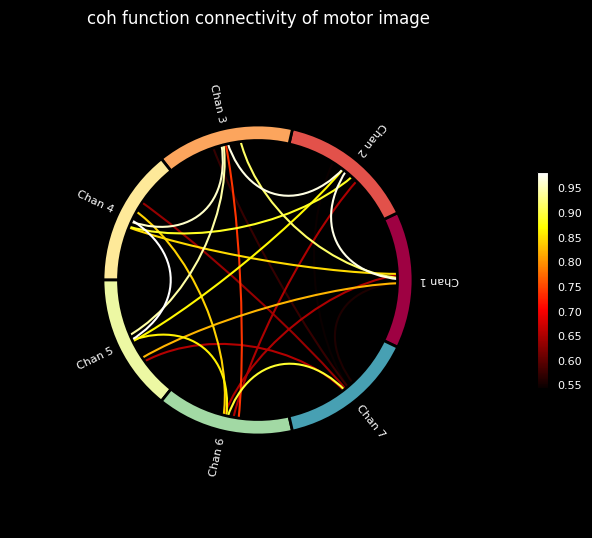

In [54]:
fig, ax = plt.subplots(figsize=(8, 8),  facecolor="Black", subplot_kw=dict(polar=True))
plot_connectivity_circle(fea.features[0], [f'Chan {i+1}' for i in range(n_channels)],
                         title=f'coh function connectivity of motor image',
                    colormap="hot",  colorbar_size=0.35, colorbar_pos=(0, 0.5), ax=ax, show=False)